In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def unit_conv(ds, var='TSA'):
    if var in ['TSA','TSKIN','TREFHT','TSMX','TSMN']:
        ds=ds-273.15
    return ds

In [3]:
ds_temp = xr.open_dataset('/glade/scratch/czarakas/archive/'+
                           'COUP0000_PI_SOM'+
                           '/atm/hist/'+
                           'COUP0000_PI_SOM.cam.h1.0049-10.nc')
weights =ds_temp.gw/ds_temp.gw.mean(dim='lat')

ds_temp2 = xr.open_dataset('/glade/scratch/czarakas/archive/'+
                           'COUP0000_PI_SOM'+
                           '/lnd/hist/'+
                           'COUP0000_PI_SOM.clm2.h0.0049-02-01-00000.nc')

landarea=(ds_temp2.area*ds_temp2.landfrac)
landweights=landarea/landarea.mean(dim=['lat','lon'])

In [4]:
keys=['COUP0001','COUP0002','COUP0003','COUP0004','COUP0005',
      'COUP0006','COUP0007','COUP0008','COUP0009','COUP0010',
      'COUP0011','COUP0012','COUP0013','COUP0014','COUP0015',
      'COUP0016','COUP0017','COUP0018','COUP0019','COUP0020',
      'COUP0021','COUP0022','COUP0023','COUP0024','COUP0025',
     'COUP0026','COUP0027','COUP0028','COUP0029','COUP0030',
     'COUP0031','COUP0032','COUP0033','COUP0034','COUP0035',
     'COUP0036']

# Land

In [5]:
var='TLAI'
ensemble_lnd = []
basecase_lnd=xr.open_dataset('/glade/scratch/czarakas/archive/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+var+'.nc')
for key in keys:
    #print(key)
    ds = xr.open_mfdataset('/glade/scratch/czarakas/archive/'+
                           key+'_PI_SOM_v02/lnd/proc/tseries/'+
                           key+'_PI_SOM_v02.clm2.h0.timeseries.'+var+'.nc')
    ensemble_lnd.append(ds)

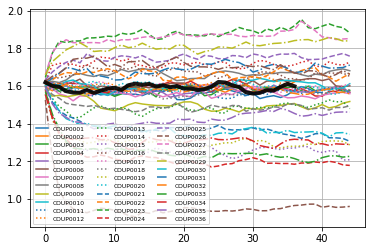

In [6]:
var='TLAI'
for i,key in enumerate(keys):
    if i>27:
        linestyle='dashdot'
    elif i>19:
        linestyle='--'
    elif i>9:
        linestyle=':'
    else:
        linestyle='-'
    ds=ensemble_lnd[i]
    plt.plot(unit_conv((ds[var]*landweights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'),
                       var=var),
            label=key, linestyle=linestyle)
plt.plot(unit_conv((basecase_lnd[var]*landweights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'),
                   var=var),
         '-k',linewidth=4,alpha=0.9)
plt.legend(ncol=3,fontsize=6)
plt.grid()

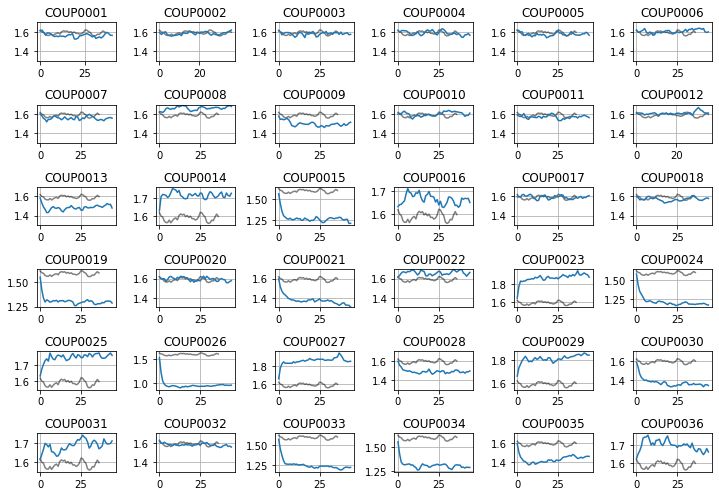

In [7]:
plt.figure(figsize=(10,7))
for i,key in enumerate(keys):
    ds=ensemble_lnd[i]
    annual_mean=(ds[var]*landweights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')
    
    plt.subplot(6,6,i+1)
    plt.plot((basecase_lnd[var]*landweights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'),
            '-k',alpha=0.5,label='baseline')
    plt.plot(annual_mean,
            '-',label=key)
    
    plt.title(key)
    if ((np.nanmin(annual_mean)>1.3)&(np.nanmax(annual_mean)<1.7)):
        plt.ylim([1.3, 1.7])
    plt.grid()
    #plt.ylim([0.8,1.9])
plt.tight_layout()

# Atmosphere

In [5]:
var='TREFHT'
ensemble_atm = []
basecase=xr.open_dataset('/glade/scratch/czarakas/archive/COUP0000_PI_SOM/atm/proc/tseries/COUP0000_PI_SOM.cam.h1.timeseries.'+var+'.nc')
for key in keys:
    #print(key)
    ds = xr.open_mfdataset('/glade/scratch/czarakas/archive/'+
                           key+'_PI_SOM_v02/atm/proc/tseries/'+
                           key+'_PI_SOM_v02.cam.h1.timeseries.'+var+'.nc')
    ensemble_atm.append(ds)

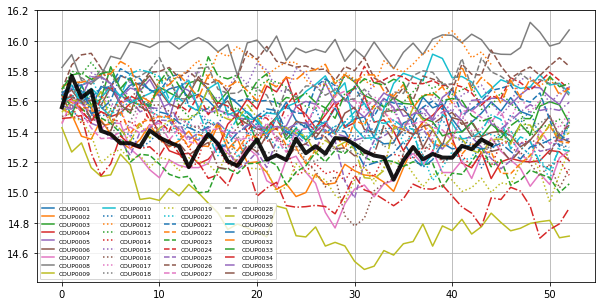

In [6]:
plt.figure(figsize=(10,5))
for i,key in enumerate(keys):
    if i>27:
        linestyle='dashdot'
    elif i>19:
        linestyle='--'
    elif i>9:
        linestyle=':'
    else:
        linestyle='-'
    ds=ensemble_atm[i]
    plt.plot((ds['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').load()-273.15,
             linestyle=linestyle,
            label=key)
plt.plot((basecase['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').load()-273.15,
         '-k',linewidth=4,alpha=0.9)
plt.legend(ncol=4,fontsize=6)
plt.grid()

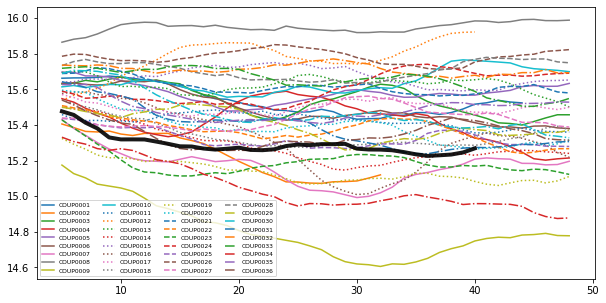

In [7]:
plt.figure(figsize=(10,5))
for i,key in enumerate(keys):
    if i>27:
        linestyle='dashdot'
    elif i>19:
        linestyle='--'
    elif i>9:
        linestyle=':'
    else:
        linestyle='-'
    ds=ensemble_atm[i]
    plt.plot((ds['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').load().rolling(year=10,center=True).mean()-273.15,
             linestyle=linestyle,
            label=key)
plt.plot((basecase['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').load().rolling(year=10,center=True).mean()-273.15,
         '-k',linewidth=4,alpha=0.9)
plt.legend(ncol=4,fontsize=6)


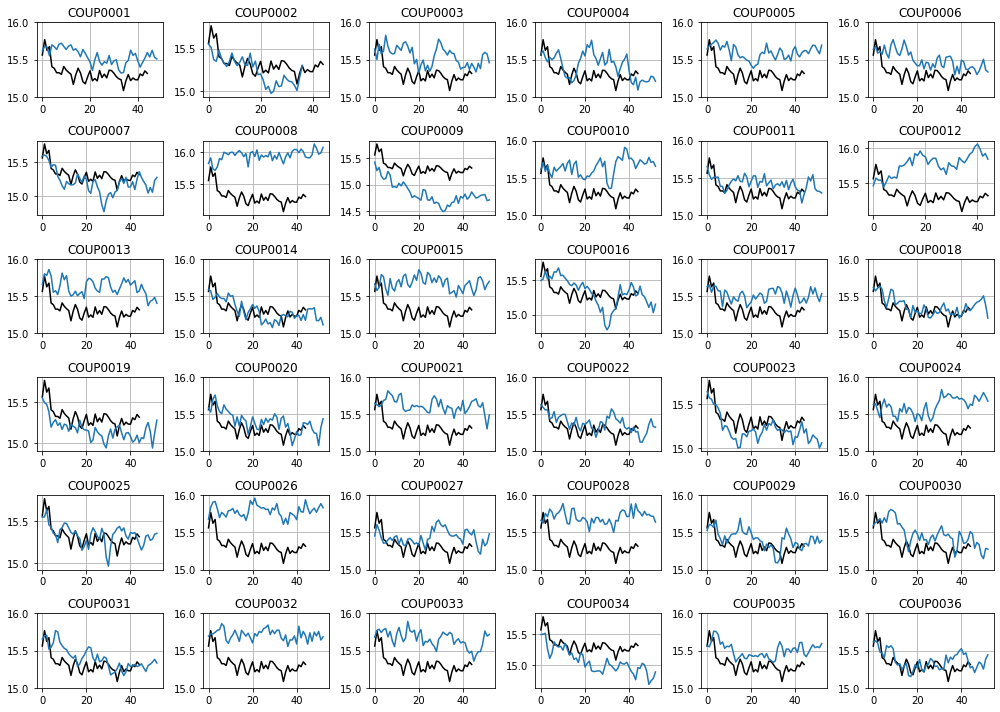

In [8]:
plt.figure(figsize=(14,10))
var='TREFHT'
basecase_annual_mean=(basecase[var]*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    plt.subplot(6,6,i+1)
    plt.title(key)
    plt.plot(basecase_annual_mean,
            '-k',label='key')
    annual_mean=(ds[var]*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15
    plt.plot(annual_mean,
            '-',label='key')
    if ((np.nanmin(annual_mean)>15)&(np.nanmax(annual_mean)<16)):
        plt.ylim([15, 16])
    plt.grid()
plt.tight_layout()
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

In [9]:
plt.figure(figsize=(14,10))
var='TREFHT'
basecase_annual_mean=(basecase[var]*weights).mean(dim=['lat','lon'])-273.15
basecase_annual_avg=basecase_annual_mean[(yr_spin_up_done*12):(37*12)].mean(dim=['time']).values
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    print(key)
    annual_mean=(ds[var]*weights).mean(dim=['lat','lon'])-273.15
    print(annual_mean[(yr_spin_up_done*12):(37*12)].mean(dim=['time']).values-basecase_annual_avg)
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

NameError: name 'yr_spin_up_done' is not defined

<Figure size 1008x720 with 0 Axes>

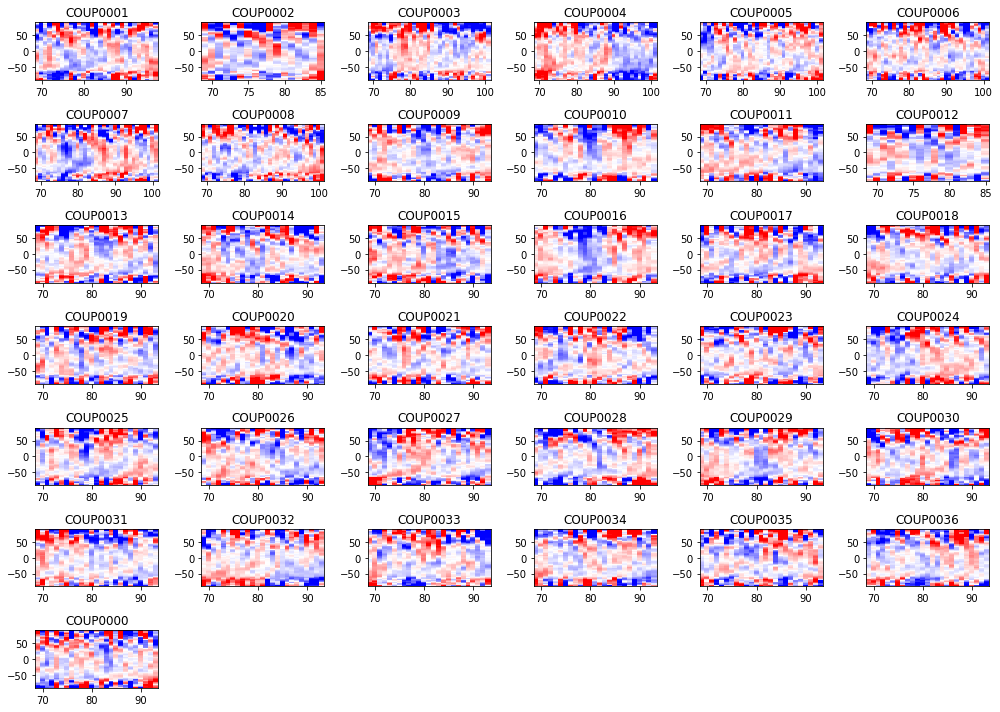

In [13]:
var = 'TREFHT'
yr_spin_up_done=20

plt.figure(figsize=(14,10))
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    plt.subplot(7,6,i+1)
    plt.title(key)
    var_series = ds[var]-273.15
    var_zonal_mean = var_series.mean(dim='lon')
    var_zonal_mean = var_zonal_mean.groupby('time.year').mean(dim='time')
    var_zonal_mean=var_zonal_mean[yr_spin_up_done:,:]
    var_zonal_mean = var_zonal_mean - var_zonal_mean.mean(dim='year')
    cbound = np.max(np.abs([np.nanpercentile(var_zonal_mean,95),np.nanpercentile(var_zonal_mean,5)]))
    plt.pcolor(var_zonal_mean.year, var_zonal_mean.lat, var_zonal_mean.transpose(), cmap=plt.cm.bwr,
          vmin=-cbound, vmax=cbound, shading='auto')
    #, tlai_zonal_mean.time, tlai_zonal_mean.lat)

ds=basecase
plt.subplot(7,6,i+2)
plt.title('COUP0000')
var_series = ds[var]-273.15
var_zonal_mean = var_series.mean(dim='lon')
var_zonal_mean = var_zonal_mean.groupby('time.year').mean(dim='time')
var_zonal_mean=var_zonal_mean[yr_spin_up_done:,:]
var_zonal_mean = var_zonal_mean - var_zonal_mean.mean(dim='year')
cbound = np.max(np.abs([np.nanpercentile(var_zonal_mean,95),np.nanpercentile(var_zonal_mean,5)]))
plt.pcolor(var_zonal_mean.year, var_zonal_mean.lat, var_zonal_mean.transpose(), cmap=plt.cm.bwr,
      vmin=-cbound, vmax=cbound, shading='auto')
plt.tight_layout()
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

In [ ]:
plt.figure(figsize=(14,10))
yr_spin_up_done=15
var='TREFHT'
basecase_annual_mean=(basecase[var])[(yr_spin_up_done*12):(45*12):,:,:].mean(dim=['time'])-273.15
for i,key in enumerate(keys):
    ds=ensemble_atm[i]
    plt.subplot(6,6,i+1)
    plt.title(key)
    annual_mean=(ds[var])[(yr_spin_up_done*12):(45*12):,:,:].mean(dim=['time'])-273.15
    plt.pcolormesh(annual_mean-basecase_annual_mean, vmin=-2, vmax=2, cmap=plt.cm.bwr)
    plt.grid()
plt.tight_layout()
#plt.plot((ds01['TREFHT']*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))

# Compare

In [116]:
import datetime
test=xr.open_mfdataset('/glade/scratch/czarakas/archive/PPE_old/COUP0000_PI_SOM_v02/atm/hist/*.cam.h1.*.nc')


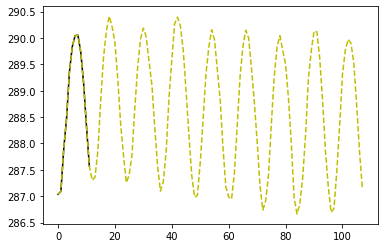

In [124]:
plt.plot((test['TREFHT']*weights).mean(dim=['lat','lon']),'k',label='PPEn08')
plt.plot((basecase['TREFHT']*weights).mean(dim=['lat','lon']),'--y',label='PPEn08')

In [131]:
basecase['TREFHT']*weights

<xarray.DataArray (time: 156, lat: 96, lon: 144)>
array([[[ 1.61683549,  1.61600931,  1.61585503, ...,  1.61710871,
          1.61708839,  1.6170136 ],
        [12.98688953, 12.97383837, 12.96925308, ..., 13.00018413,
         12.99720922, 12.99328859],
        [25.99392411, 25.96644825, 25.95597333, ..., 26.07402586,
         26.05944037, 26.03641124],
        ...,
        [25.24824082, 25.23612039, 25.23094536, ..., 25.26647109,
         25.25995467, 25.25594014],
        [12.57128231, 12.56891039, 12.56640954, ..., 12.57370307,
         12.57345403, 12.57278378],
        [ 1.56651257,  1.56640184,  1.56627829, ...,  1.56680942,
          1.56671281,  1.56661059]],

       [[ 1.55184152,  1.55101034,  1.55085485, ...,  1.55211715,
          1.55209662,  1.55202133],
        [12.51383573, 12.49819964, 12.49128007, ..., 12.53186536,
         12.52721762, 12.52184756],
        [25.16787975, 25.144817  , 25.1269613 , ..., 25.23633809,
         25.22154931, 25.20433228],
...
        [26.50570809, 26.50348313, 26.49879951, ..., 26.47730383,
         26.49606393, 26.50437471],
        [13.2424058 , 13.24099162, 13.2392315 , ..., 13.23997062,
         13.24157379, 13.24259479],
        [ 1.64957581,  1.64936577,  1.64913539, ...,  1.64989079,
          1.64983432,  1.64973761]],

       [[ 1.61121454,  1.61040078,  1.6102486 , ...,  1.61148666,
          1.61146624,  1.61139105],
        [12.94475072, 12.92998348, 12.92312077, ..., 12.963445  ,
         12.95794843, 12.95306125],
        [25.94501661, 25.91028162, 25.89253797, ..., 26.04202966,
         26.02498551, 25.99379445],
        ...,
        [25.85886264, 25.85563085, 25.85542596, ..., 25.85329064,
         25.85249029, 25.85665849],
        [12.85331571, 12.84753325, 12.84067455, ..., 12.86236776,
         12.86006791, 12.85724916],
        [ 1.59878704,  1.59825892,  1.59762437, ...,  1.59996504,
          1.59962494,  1.59923828]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0049-01-16 12:00:00 ... 0057-12-16 12:00:00

In [125]:
test2=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_SOM_v02/atm/proc/tseries/*TREFHT*.nc')

In [128]:
test3=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_PI_SOM/atm/hist/*.cam.h1.*.nc')

In [141]:
import numpy as np

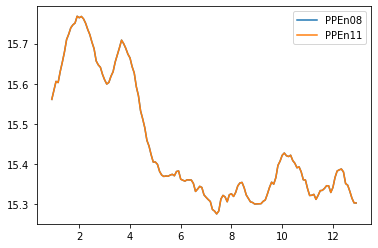

In [142]:
plt.plot(np.arange(0,156)/12,(test3['TREFHT']*weights).mean(dim=['lat','lon']).load().rolling(time=12).mean()-273.15,label='PPEn08')
plt.plot(np.arange(0,156)/12,(basecase['TREFHT']*weights).mean(dim=['lat','lon']).load().rolling(time=12).mean()-273.15,label='PPEn11')
plt.legend()